# Check Retention Cohort Table
* StelllarAlgo Data Science
* Ryan Kazmerik
* Sep 7, 2022

In [28]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt

from shared_utilities import helpers

In [29]:
if not boto3.DEFAULT_SESSION:
    ! aws sso login --profile Stellaralgo-DataScienceAdmin
    session = boto3.setup_default_session(profile_name='Stellaralgo-DataScienceAdmin')

In [30]:
CLUSTER = "prod-app"
DATABASE = "stlrnfl49ers"
LKUPCLIENTID = 95

CNXN = helpers.get_redshift_connection(CLUSTER, DATABASE)

Authorized as AROASQ4JELIXYLYV6P4UV:gdonst@stellaralgo.com


In [31]:
sql= f"""
    SELECT * FROM {DATABASE}.dw.cohortretentionscore
    WHERE lkupclientid = {LKUPCLIENTID}
    AND date_effective_end IS NULL
"""

try:
    cursor = CNXN.cursor()
    cursor.execute(sql)
    data = cursor.fetchall()

    print(f"ROWS RETRIEVED: {len(data)}")

except Exception as e:
    print(f"ERROR:, {e}")
    cursor.execute("ROLLBACK")

finally:
    cursor.close()


ROWS RETRIEVED: 37019


In [32]:
cols = [row[0] for row in cursor.description]
df_scores = pd.DataFrame(data=data, columns=cols)

print(f"MAX SCORE DATE: {str(df_scores['updatedatetime'].max())[:10]}")

MAX SCORE DATE: 2022-10-06


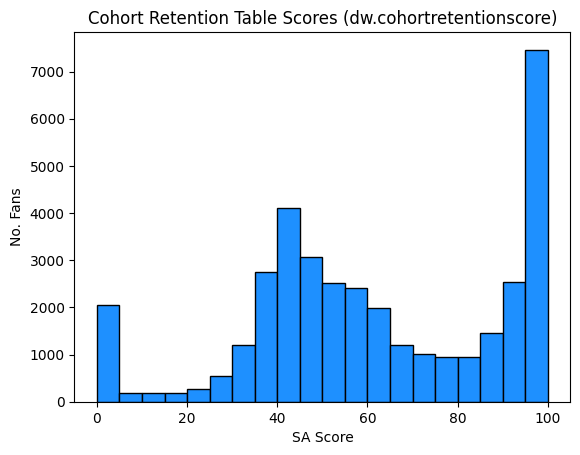

In [33]:
plt.hist(df_scores['score'], bins=20, edgecolor='black', color='dodgerblue')
plt.title("Cohort Retention Table Scores (dw.cohortretentionscore)")
plt.ylabel('No. Fans')
plt.xlabel('SA Score')

plt.show()

### Done